In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from py_funcs.func_project_dir import *

warnings.simplefilter('ignore')

sns.set_style("darkgrid")
dark_palette = sns.color_palette("colorblind")
sns.set_palette(dark_palette)
sns.set_color_codes("colorblind")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

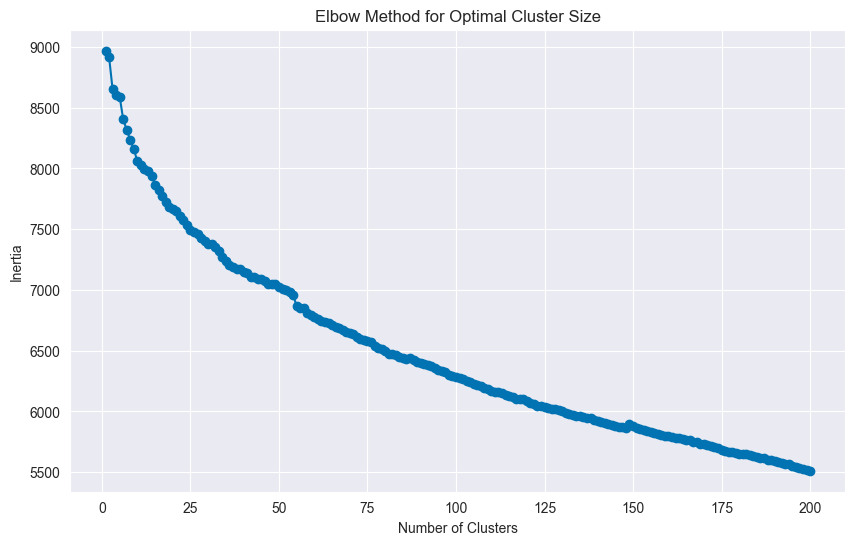

In [2]:
df_subjects     = pd.read_csv(project_path()+r"/data/target_data/df_subjects.csv", index_col=0)
df_sepsis_flag  = pd.read_csv(project_path()+r"/data/target_data/df_sepsis_flag.csv", index_col=0)
df              = df_subjects.merge(df_sepsis_flag.groupby("ICUSTAY_ID")[["SEPSIS_FLAG"]].max().reset_index())

diagnosis   = df.groupby(["DIAGNOSIS", "SEPSIS_FLAG"])[["ICUSTAY_ID"]].count().sort_values(by="ICUSTAY_ID", ascending=False).reset_index()
vectorizer  = TfidfVectorizer(stop_words='english')
X           = vectorizer.fit_transform(diagnosis['DIAGNOSIS'])

inertia_values = []
cluster_range = range(1, 201)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot der Inertia-Werte
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()